In [ ]:
from google.colab import drive
drive.mount('/content/drive')

WineQT.csv loaded successfully!

📊 TABULAR SUMMARY: MEAN CHEMICAL VALUES PER QUALITY LEVEL


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,8.450,0.898,0.212,2.667,0.105,8.167,24.500,0.998,3.362,0.550,9.692
4,7.809,0.700,0.166,2.567,0.095,14.848,40.606,0.997,3.391,0.638,10.261
5,8.161,0.585,0.240,2.540,0.092,16.613,55.299,0.997,3.302,0.613,9.902
6,8.318,0.505,0.264,2.445,0.085,15.215,39.942,0.997,3.324,0.677,10.655
7,8.851,0.394,0.387,2.760,0.075,14.538,37.490,0.996,3.287,0.744,11.483
8,8.806,0.410,0.432,2.644,0.070,11.062,29.375,0.996,3.241,0.766,11.938


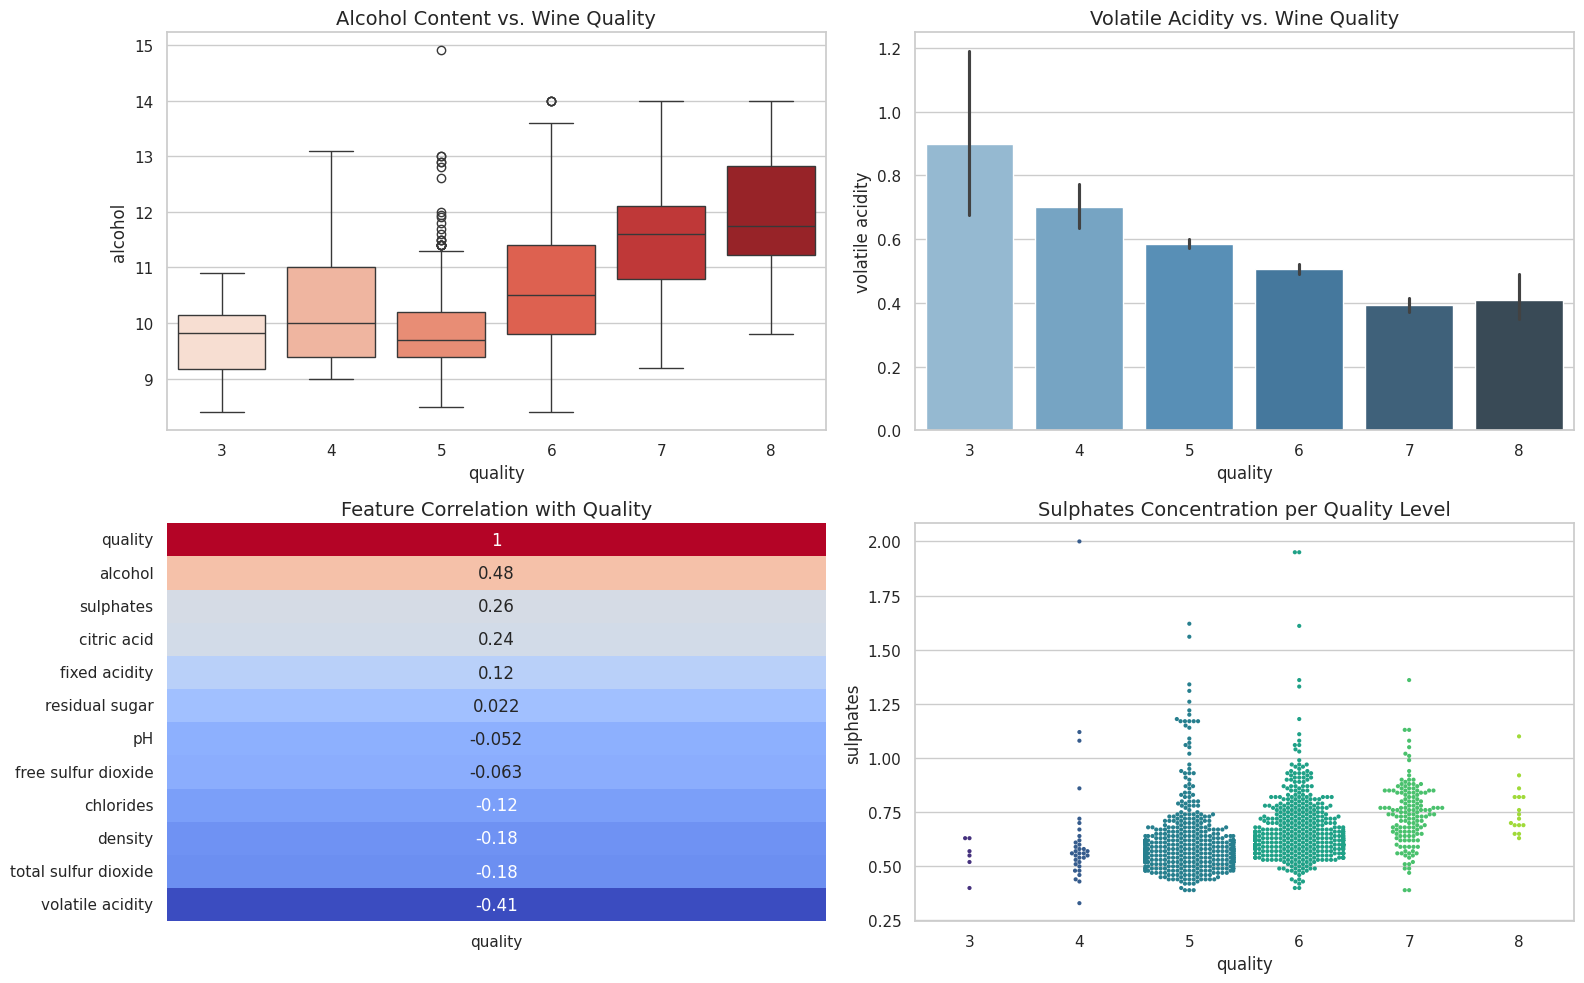


📈 MODEL PERFORMANCE (Good vs. Average)
Accuracy Score: 91.70%


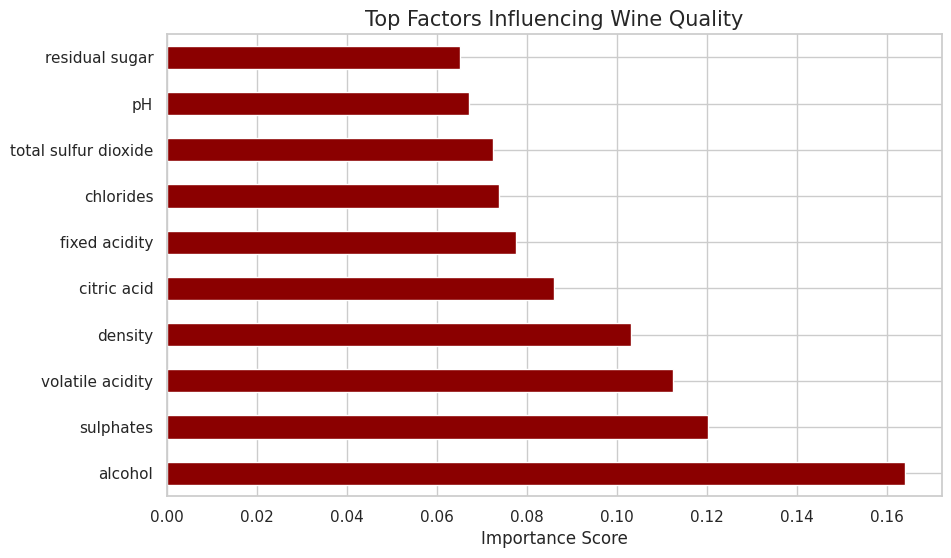

In [25]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import warnings
warnings.filterwarnings('ignore')


try:
    df = pd.read_csv('/content/sample_data/WineQT.csv')
    print("WineQT.csv loaded successfully!")


    df.columns = df.columns.str.strip()
    df.drop('Id', axis=1, inplace=True, errors='ignore')

except FileNotFoundError:
    print(" ERROR: 'WineQT.csv' not found. Please ensure your file is named 'Dataset.csv' in the sidebar.")


print("\n" + "="*60)
print("📊 TABULAR SUMMARY: MEAN CHEMICAL VALUES PER QUALITY LEVEL")
print("="*60)

summary_table = df.groupby('quality').mean().round(3)
display(summary_table)


plt.figure(figsize=(16, 10))


plt.subplot(2, 2, 1)
sns.boxplot(x='quality', y='alcohol', data=df, palette='Reds')
plt.title('Alcohol Content vs. Wine Quality', fontsize=14)

plt.subplot(2, 2, 2)
sns.barplot(x='quality', y='volatile acidity', data=df, palette='Blues_d')
plt.title('Volatile Acidity vs. Wine Quality', fontsize=14)


plt.subplot(2, 2, 3)
sns.heatmap(df.corr()[['quality']].sort_values(by='quality', ascending=False),
            annot=True, cmap='coolwarm', cbar=False)
plt.title('Feature Correlation with Quality', fontsize=14)


plt.subplot(2, 2, 4)
sns.swarmplot(x='quality', y='sulphates', data=df, size=3, palette='viridis')
plt.title('Sulphates Concentration per Quality Level', fontsize=14)

plt.tight_layout()
plt.show()

df['is_good'] = df['quality'].apply(lambda x: 1 if x >= 7 else 0)

X = df.drop(['quality', 'is_good'], axis=1)
y = df['is_good']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("\n" + "="*40)
print("📈 MODEL PERFORMANCE (Good vs. Average)")
print("="*40)
print(f"Accuracy Score: {accuracy_score(y_test, y_pred)*100:.2f}%")

plt.figure(figsize=(10, 6))
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh', color='darkred')
plt.title('Top Factors Influencing Wine Quality', fontsize=15)
plt.xlabel('Importance Score')
plt.show()
